In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dirname = "sotsuken/"
os.makedirs(dirname, exist_ok=True)
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

# パラメータセット

In [348]:
# ずっと使ってきたやつ
set_parameter = 3

# ch10
# set_parameter = 2

In [349]:
# 効用関数の設定
# LQR_util = 2で効用をマイナスに設定
# LQR_util = 2ではLQRの重み行列が正定値行列とならず破綻
LQR_util = 1

In [350]:
if set_parameter == 1:
    # Set parameters ずっと使ってきたやつ
    mu_d = 13.0
    rho = 0.05
    gan = 8.0
    c_d = 1.0
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 2:
    # Set parameters in ch10
    mu_d = 13.594
    rho = 0.241
    gan = 500.0
    c_d = 0.2
    beta_std = 0.997
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 3:
    # 自由に変えていいよ
    mu_d = 0.00
    rho = 0.05
    gan = 0.0
    c_d = 1.0
    #beta_std = 0.9494764430324878
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 1e-9

In [351]:
sig_arr = [-1e-9, -1e-1]
d_first = 0.0
k_first = 0.0

In [352]:
# uncertaintyあり、なし全ての期間を決定
iter_t = 1500
iter_uti= iter_t

In [353]:
np.random.seed(5)
eps = np.random.randn(iter_t)

In [354]:
ovr = 120
tapple_y = 20
y_lim = (-ovr, ovr)

# w\o mis 

## in Matlab module

In [355]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [356]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp, olrprobust, doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
# from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
# from olrprobust_1_using import olrp,olrprobust,doubleo

In [357]:
# y=[1 d k]のやつ
QLQ_mat = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ponji]])
ALQ_mat = np.array(
    [[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R_kinri]]
)
# u=\gamma - c_tにしたため符号を反転した
BLQ_mat = np.array([[0.0], [0.0], [1.0]])
CLQ_mat = np.array([[0.0], [c_d], [0.0]])
RLQ_mat = np.array([[1]])
if LQR_util == 2:
    RLQ_mat = -RLQ_mat
    QLQ_mat = -QLQ_mat
F_nomis_mat, K_nomis_mat, P_nomis_mat, Pt_nomis_mat = olrprobust(
    beta_std, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[0]
)
print(f"F = {F_nomis_mat[0]}")

F = [0.         0.05249348 0.05263162]


In [358]:
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R_kinri]])
ALQ_quant = np.vstack([ALQ_l, ALQ_r])
RLQ_quant = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ponji],
    ]
)
QLQ_quant = np.array([1.0])
BLQ_quant = np.array([0.0, 0.0, 1.0]).reshape(3, 1)
CLQ_quant = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta_std

In [359]:
lqpi = qe.LQ(QLQ_quant, RLQ_quant, ALQ_quant, BLQ_quant, C=CLQ_quant, beta=beta_LQ)
P_nomis_quant, F_nomis_quant, d_nomis_quant = lqpi.stationary_values()

In [360]:
y_nomis_mat = np.array([[1.0, d_first, k_first]])
ABF_nomis_mat = ALQ_mat - BLQ_mat @ F_nomis_quant
for i in range(iter_t):
    y_nomis_mat = np.insert(
        y_nomis_mat, 0, ABF_nomis_mat @ y_nomis_mat[0].T + CLQ_mat.T * eps[i], axis=0
    )

In [361]:
# 0-iter_tまでのiter_t+1の長さになっている。
y_nomis_mat = y_nomis_mat[::-1]
k_nomis_mat = y_nomis_mat[:, 2]
d_nomis_mat = y_nomis_mat[:, 1]

In [362]:
print(f"y.shape = {y_nomis_mat.shape}")

y.shape = (1501, 3)


In [363]:
c_nomis_mat = np.zeros(iter_t + 1)
for i in range(iter_t + 1):
    c_nomis_mat[i] = F_nomis_mat @ y_nomis_mat[i] + gan
print(f"c.shape = {c_nomis_mat.shape}")

c.shape = (1501,)


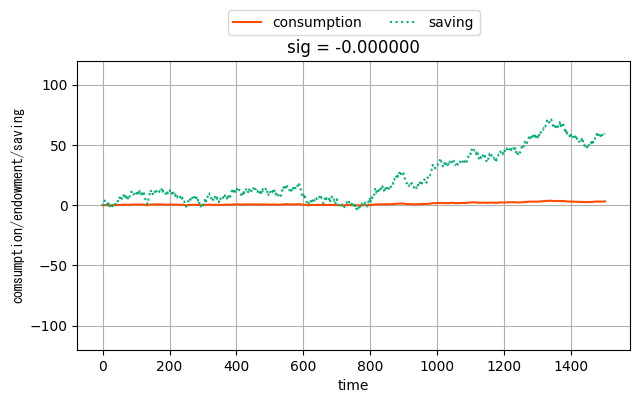

In [364]:

plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[0]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_nomis_mat[:iter_t+1],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
#plt.plot(
#    np.array(range(iter_t)),
#    d_nomis_mat[:iter_t],
#    linestyle="--",
#    label="endowment",
#    color=colorlist[1],
#)

# Plot saving
plt.plot(
    np.array(range(iter_t)),
    k_nomis_mat[1:iter_t+1],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()
plt.savefig("%sch10_1.png" % dirname)

## in Quant

In [365]:
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R_kinri]])
ALQ_quant = np.vstack([ALQ_l, ALQ_r])
RLQ_quant = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ponji],
    ]
)
QLQ_quant = np.array([1.0])
BLQ_quant = np.array([0.0, 0.0, 1.0]).reshape(3, 1)
CLQ_quant = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta_std

In [366]:
lqpi = qe.LQ(QLQ_quant, RLQ_quant, ALQ_quant, BLQ_quant, C=CLQ_quant, beta=beta_LQ)
P_nomis_quant, F_nomis_quant, d_nomis_quant = lqpi.stationary_values()

## compare both optimal regulator

In [367]:
print(f"F in matlab = \n {F_nomis_mat}")
print(f"F in Quant = \n {F_nomis_quant}")

F in matlab = 
 [[0.         0.05249348 0.05263162]]
F in Quant = 
 [[0.         0.05249346 0.0526316 ]]


# w\ mis 

## in Matlab module

### uncertainty included の貯蓄プロット

In [368]:
F_mis_mat, K_mis_mat, P_mis_mat, Pt_mis_mat = olrprobust(
    beta_std, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[1]
)
print(f"F = {F_mis_mat[0]}")

F = [0.         0.05863301 0.05878731]


In [369]:
theta_LQ = -1 / sig_arr[1]
rblq_mis = qe.RBLQ(
    QLQ_quant,
    RLQ_quant,
    ALQ_quant,
    BLQ_quant,
    C=CLQ_quant,
    beta=beta_LQ,
    theta=theta_LQ,
)
(
    F_mis_quant,
    P_mis_quant,
    K_mis_quant,
) = rblq_mis.robust_rule()  # Compute value function and decision rule

In [370]:
y_mis_mat = np.array([[1.0, d_first, k_first]])
ABF_mis_mat = ALQ_mat - BLQ_mat @ F_mis_quant
for i in range(iter_t):
    y_mis_mat = np.insert(
        y_mis_mat, 0, ABF_mis_mat @ y_mis_mat[0].T + CLQ_mat.T * eps[i], axis=0
    )

In [371]:
y_mis_mat = y_mis_mat[::-1]
k_mis_mat = y_mis_mat[:, 2]
d_mis_mat = y_mis_mat[:, 1]

In [372]:
c_mis_mat = np.zeros(iter_t + 1)
for i in range(iter_t+1):
    c_mis_mat[i] = F_mis_mat @ y_mis_mat[i] + gan   
print(f"F= {F_mis_mat}")

F= [[0.         0.05863301 0.05878731]]


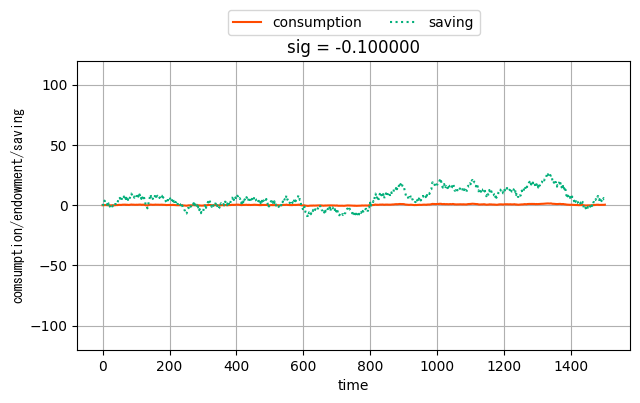

In [373]:
plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[1]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_mis_mat[:iter_t+1],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
#plt.plot(
#    np.array(range(iter_t)),
#    d_mis_mat[:iter_t],
#    linestyle="--",
#    label="endowment",
#    color=colorlist[1],
#)

# Plot saving
plt.plot(
    np.array(range(iter_t )),
    k_mis_mat[1:iter_t+1],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()
plt.savefig("%sch10_2.png" % dirname)

## in Qunat

In [374]:
theta_LQ = -1 / sig_arr[1]

In [375]:
rblq_mis = qe.RBLQ(
    QLQ_quant,
    RLQ_quant,
    ALQ_quant,
    BLQ_quant,
    C=CLQ_quant,
    beta=beta_LQ,
    theta=theta_LQ,
)
(
    F_mis_quant,
    P_mis_quant,
    K_mis_quant,
) = rblq_mis.robust_rule()  # Compute value function and decision rule

In [376]:
print(f"-F in Quant w\ mis= \n {-F_mis_quant}")
print(f"-F in sargent w\ mis = \n {-F_mis_mat}")

-F in Quant w\ mis= 
 [[-0.         -0.05863299 -0.05878729]]
-F in sargent w\ mis = 
 [[-0.         -0.05863301 -0.05878731]]


## 色々比べてみる

### utility

In [377]:
# i期までの累積効用
util_nomis = np.zeros(iter_t + 1)
util_mis = np.zeros(iter_t + 1)


util_nomis_fun = np.zeros(iter_t + 1)
util_mis_fun = np.zeros(iter_t + 1)
for i in range(iter_uti + 1):  # range(stop): 0 ≦ i < stop
    if i == 0:
        util_nomis[i] = -((c_nomis_mat[i] - gan) ** 2) * beta_std**i
        util_mis[i] = -((c_mis_mat[i] - gan) ** 2) * beta_std**i
    else:
        util_nomis[i] = (
            util_nomis[i - 1] - ((c_nomis_mat[i] - gan) ** 2) * beta_std**i
        )
        util_mis[i] = util_mis[i - 1] - ((c_mis_mat[i] - gan) ** 2) * beta_std**i

    util_nomis_fun[i] = (c_nomis_mat[i] - gan) 
    util_mis_fun[i] = (c_mis_mat[i] - gan)
# print(f"util_nomis.shape = {util_nomis.shape}")
# print(f"util_mis.shape = {util_mis.shape}")
print(f"nomis util = {util_nomis[iter_uti-1]}")
print(f"mis util = {util_mis[iter_uti-1]}")

nomis util = -0.40375339877870403
mis util = -0.42181689470585576


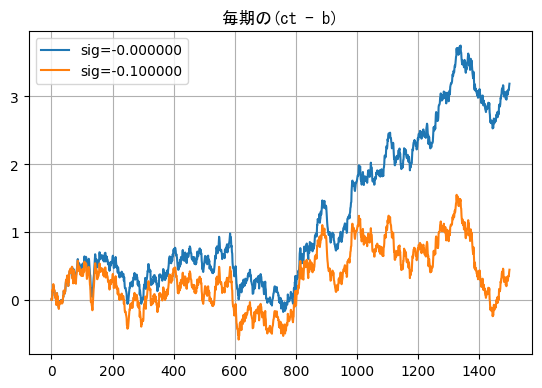

In [378]:
plt.figure(figsize=[6.5, 4.2])
plt.title("毎期の(ct - b)",fontname="MS Gothic")

# Plot consumption
plt.plot(
    np.array(range(iter_uti+1)),
    util_nomis_fun[:iter_uti+1],
    linestyle="-",
    label="sig=%f" % sig_arr[0],
)

plt.plot(
    np.array(range(iter_uti+1)),
    util_mis_fun[:iter_uti+1],
    linestyle="-",
    label="sig=%f" % sig_arr[1],
)


# Legend with specified arguments
plt.legend()
plt.grid()
plt.savefig("%sch10_util_fun.png" % dirname)

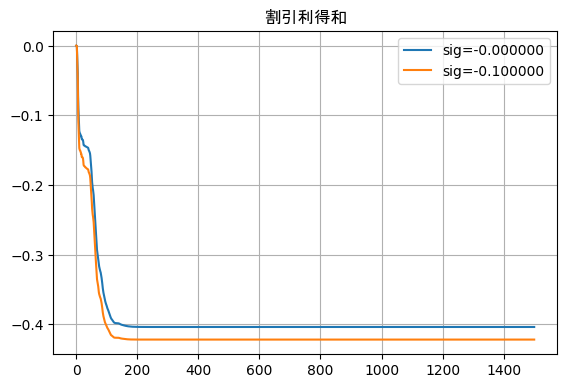

In [379]:
plt.figure(figsize=[6.5, 4.2])
plt.title("割引利得和",fontname="MS Gothic")

# Plot consumption
plt.plot(
    np.array(range(iter_uti+1)),
    util_nomis[:iter_uti+1],
    linestyle="-",
    label="sig=%f" % sig_arr[0],
)

plt.plot(
    np.array(range(iter_uti+1)),
    util_mis[:iter_uti+1],
    linestyle="-",
    label="sig=%f" % sig_arr[1],
)


# Legend with specified arguments
plt.legend()
plt.grid()
plt.savefig("%sch10_util_fun.png" % dirname)

### mean of consumption

In [380]:
print(f"mean of consumption w\o mis = {np.mean(c_nomis_mat)}")
print(f"mean of consumption w\ mis  = {np.mean(c_mis_mat)}")

mean of consumption w\o mis = 1.1911423345491956
mean of consumption w\ mis  = 0.3376846276940369


#### consumption

In [381]:
#print(f"consumption w\o mis = {c_nomis_mat}")
#print(f"consumption w\ mis  = {c_mis_mat}")

#### saving

In [382]:
# savingの
#print(f"saving w\o mis = {k_nomis_mat}")
#print(f"saving w\ mis  = {k_mis_mat}")

### uncertaintyありなしの消費

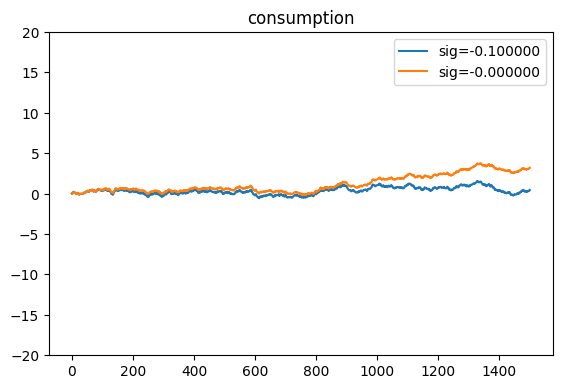

In [383]:
plt.figure(figsize=[6.5, 4.2])
plt.title("consumption")
plt.ylim((mu_d - tapple_y, mu_d + tapple_y))

# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_mis_mat[:iter_t+1],
    linestyle="-",
    label="sig=%f" % sig_arr[1],
)

plt.plot(
    np.array(range(iter_t+1)),
    c_nomis_mat[:iter_t+1],
    linestyle="-",
    label="sig=%f" % sig_arr[0],
)


# Legend with specified arguments
plt.legend()
plt.savefig("%sch10_combine.png" % dirname)

### dt - ct = kt - R*kt-1の確認

In [384]:
k_nomis_sum = np.zeros(iter_t+1)
k_mis_sum = np.zeros(iter_t+1)
#print(f"k_mis_sum.shape = {k_mis_sum.shape}")
for i in range(iter_t):
    k_nomis_sum[i] = k_nomis_mat[i + 1] - R_kinri * k_nomis_mat[i]
    k_mis_sum[i] = k_mis_mat[i + 1] - R_kinri * k_mis_mat[i]

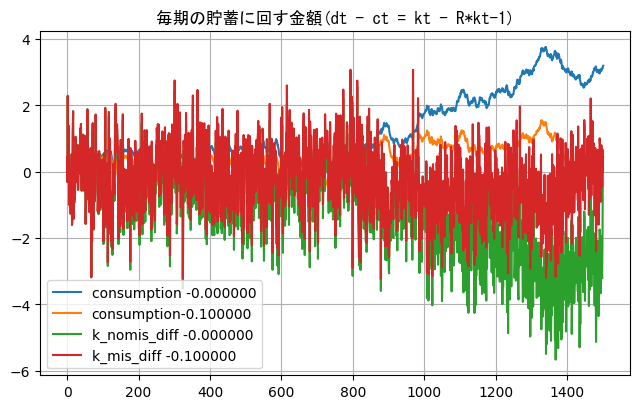

In [385]:
plt.figure(figsize=[6.5, 4.2])
plt.title("毎期の貯蓄に回す金額(dt - ct = kt - R*kt-1)",fontname="MS Gothic")
#plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_nomis_mat[:iter_t+1],
    linestyle="-",
    label="consumption %f" % sig_arr[0],
)

plt.plot(
    np.array(range(iter_t+1)),
    c_mis_mat[:iter_t+1],
    linestyle="-",
    label="consumption%f" % sig_arr[1],
)

plt.plot(
    np.array(range(iter_t)),
    k_nomis_sum[1:iter_t+1],
    linestyle="-",
    label="k_nomis_diff %f" % sig_arr[0],
)
plt.plot(
    np.array(range(iter_t)),
    k_mis_sum[1:iter_t+1],
    linestyle="-",
    label="k_mis_diff %f" % sig_arr[1],
)





# Plot saving

# Legend with specified arguments
plt.legend()
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.savefig("%sch10_sa.png" % dirname)

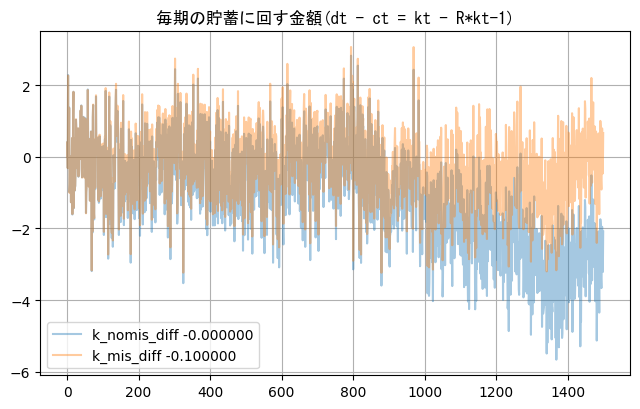

In [386]:
plt.figure(figsize=[6.5, 4.2])
plt.title("毎期の貯蓄に回す金額(dt - ct = kt - R*kt-1)",fontname="MS Gothic")
# plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t)),
    k_nomis_sum[:iter_t],
    alpha=0.4,
    linestyle="-",
    label="k_nomis_diff %f" % sig_arr[0],
)
plt.plot(
    np.array(range(iter_t)),
    k_mis_sum[:iter_t],
    alpha=0.4,
    linestyle="-",
    label="k_mis_diff %f" % sig_arr[1],
)

# Plot saving

# Legend with specified arguments
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("%sch10_sa_only_saving.png" % dirname)

### 貯蓄を一枚の図に

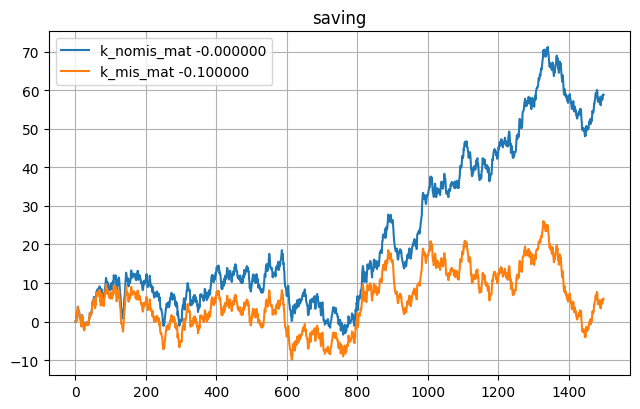

In [387]:
plt.figure(figsize=[6.5, 4.2])
# plt.ylim(y_lim)
plt.title("saving")
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]

# Plot consumption
plt.plot(
    np.array(range(iter_t)),
    k_nomis_mat[:iter_t],
    linestyle="-",
    label="k_nomis_mat %f" % sig_arr[0],
)
plt.plot(
    np.array(range(iter_t)),
    k_mis_mat[:iter_t],
    linestyle="-",
    label="k_mis_mat %f" % sig_arr[1],
)
# Plot saving

# Legend with specified arguments
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("%sch10_k_gather.png" % dirname)

### 図を並べる

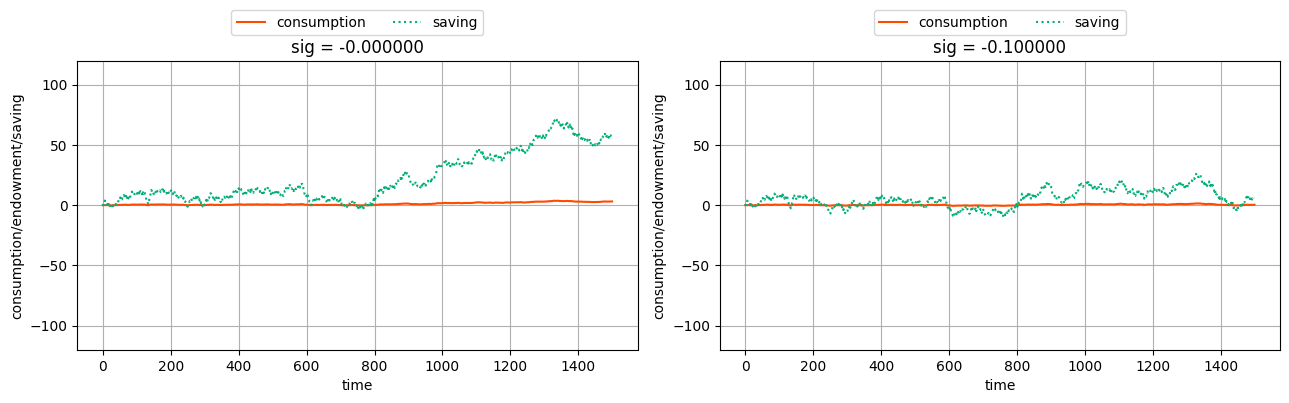

In [388]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[13, 4.2])

# Plot for the left side
axes[1].set_title(f"sig = {sig_arr[1]:.6f}")
axes[1].set_ylim(y_lim)
axes[1].plot(
    np.array(range(iter_t)),
    c_mis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[1].plot(
    np.array(range(iter_t)),
    d_mis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[1].plot(
    np.array(range(iter_t - 1)),
    k_mis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[1].set_xlabel("time", fontsize=10)
axes[1].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[1].grid()

# Plot for the right side
axes[0].set_title(f"sig = {sig_arr[0]:.6f}")
axes[0].set_ylim(y_lim)
axes[0].plot(
    np.array(range(iter_t)),
    c_nomis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[0].plot(
    np.array(range(iter_t)),
    d_nomis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[0].plot(
    np.array(range(iter_t - 1)),
    k_nomis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[0].set_xlabel("time", fontsize=10)
axes[0].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[0].grid()

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig("%scombined_ch10.png" % dirname)

# Display the combined plot
plt.show()

### 前半の消費の比較

In [389]:
c_diff = np.zeros(iter_t)
for i in range(iter_t):
    c_diff[i] = c_nomis_mat[i] - c_mis_mat[i]
    print(f"c_mis = {c_mis_mat[i]}")
    print(f"c_nomis = {c_nomis_mat[i]}")
    if c_diff[i] < 0:
        print(f"i = {i}")
        print(f"c_diff[i] = {c_diff[i]}")

c_mis = 0.0
c_nomis = 0.0
c_mis = 0.025870496086384552
c_nomis = 0.02316156409878624
i = 1
c_diff[i] = -0.0027089319875983134
c_mis = 0.006311331566782967
c_nomis = 0.0057930396199251865
i = 2
c_diff[i] = -0.0005182919468577803
c_mis = 0.1487959145363104
c_nomis = 0.1333926662937736
i = 3
c_diff[i] = -0.015403248242536777
c_mis = 0.1330990494451029
c_nomis = 0.1201594720707815
i = 4
c_diff[i] = -0.012939577374321401
c_mis = 0.1387064852444244
c_nomis = 0.12591327138591518
i = 5
c_diff[i] = -0.012793213858509206
c_mis = 0.23063828098049408
c_nomis = 0.20898320224190287
i = 6
c_diff[i] = -0.02165507873859121
c_mis = 0.17590750494213933
c_nomis = 0.16125442993528158
i = 7
c_diff[i] = -0.014653075006857752
c_mis = 0.14013523053149654
c_nomis = 0.13019736281059466
i = 8
c_diff[i] = -0.009937867720901883
c_mis = 0.15027234056831576
c_nomis = 0.14004530569577905
i = 9
c_diff[i] = -0.010227034872536706
c_mis = 0.1300060386652171
c_nomis = 0.1227292827585144
i = 10
c_diff[i] = -0.00727675590670

### 結果がおかしいので振り分けを確認してみる。

#### without uncertainty

In [390]:
sum_list = []
for i in range(iter_t):
    total = (
        c_nomis_mat[i] + k_nomis_mat[i + 1] - R_kinri * k_nomis_mat[i] - d_nomis_mat[i]
    )
    # print(type(sum))
    sum_list.append(total)
    print(f"total =  {total}")
    # print(f"eps =  {eps[i]}")

# print(f"mean =  {np.mean(sum_list)}")
# print(f"std =  {np.std(sum_list)}")

total =  0.0
total =  8.308403576240408e-09
total =  2.0780510090467885e-09
total =  4.7849967987900754e-08
total =  4.3103021707402434e-08
total =  4.5166995782386365e-08
total =  7.496543741325468e-08
total =  5.784440504363886e-08
total =  4.6703764300382034e-08
total =  5.023637053569452e-08
total =  4.402485120902355e-08
total =  2.1564849461697122e-08
total =  1.7706982657905712e-08
total =  1.0950159834433038e-08
total =  2.2313653258443367e-08
total =  -9.034654802064779e-09
total =  -2.2219168727133365e-08
total =  -5.382407852749793e-10
total =  3.4435680973388116e-08
total =  5.979860828730921e-09
total =  1.8122470968329196e-08
total =  -3.4257596759346143e-10
total =  -1.6477295528005698e-08
total =  -3.2894958090778914e-08
total =  -4.085086818816919e-08
total =  -2.2087702111761587e-08
total =  -8.672663920350487e-09
total =  -7.55896548132462e-09
total =  -1.4400183323548532e-08
total =  -1.433825341616568e-08
total =  -1.6332945079744476e-08
total =  -1.399588889228198

#### with uncertainty

In [391]:
sum_list = []
for i in range(iter_t):
    total = c_mis_mat[i] + k_mis_mat[i + 1] - R_kinri * k_mis_mat[i] - d_mis_mat[i]
    # print(type(sum))
    sum_list.append(total)
    print(f"total =  {total}")
    # print(f"eps =  {eps[i]}")

# print(f"mean =  {np.mean(sum_list)}")
# print(f"std =  {np.std(sum_list)}")

total =  0.0
total =  8.275548135650013e-09
total =  2.0188916649566124e-09
total =  4.7597377594854606e-08
total =  4.257620667136308e-08
total =  4.436993336631723e-08
total =  7.377740995906379e-08
total =  5.6269931159036446e-08
total =  4.4826966028033155e-08
total =  4.806966194537132e-08
total =  4.158680322330355e-08
total =  1.8959623648839852e-08
total =  1.5000303221768263e-08
total =  8.177863053404621e-09
total =  1.9446079191354215e-08
total =  -1.1897966833984697e-08
total =  -2.4957102495726247e-08
total =  -3.2082827505774958e-09
total =  3.164708428649021e-08
total =  3.1089828489427873e-09
total =  1.518443715209372e-08
total =  -3.3010607580763462e-09
total =  -1.9351655611288265e-08
total =  -3.558527195135497e-08
total =  -4.3290667883777445e-08
total =  -2.433521673061989e-08
total =  -1.0823427820660925e-08
total =  -9.647507931420662e-09
total =  -1.6402285252237192e-08
total =  -1.6239632692413575e-08
total =  -1.8126470185952925e-08
total =  -3.14058656858406

# Observational Equivalence

sig=0の時のFを用いて\betaを調整。

In [392]:
print(f"beta= {beta_std}")
print(f"optimal decision = {-F_nomis_mat[0]}\n")

nu = -F_nomis_mat @ CLQ_mat
alfa2 = nu.T @ nu
# print(alfa2)
beta_hat = 1 / R_kinri + sig_arr[1] * alfa2 / (R_kinri - 1)
print(f"LQR_util = {LQR_util}")
print(f"QLQ_mat = {QLQ_mat}\n")
print(f"beta hat = {beta_hat[0][0]}")



F_obs, K2, P2, Pt2 = olrprobust(
    beta_hat, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[1]
)
print(f"optimal decision = {-F_obs[0]}\n")

beta= 0.95
optimal decision = [-0.         -0.05249348 -0.05263162]

LQR_util = 1
QLQ_mat = [[0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-09]]

beta hat = 0.9447644266355056
optimal decision = [-0.         -0.05249347 -0.05263161]



## 同じプロットが得られるのか確認

In [393]:
y_mis_mat_obs = np.array([[1.0, d_first, k_first]])
ABF_mis_mat_obs = ALQ_mat - BLQ_mat @ F_obs
for i in range(iter_t):
    y_mis_mat_obs = np.insert(
        y_mis_mat_obs,
        0,
        ABF_mis_mat_obs @ y_mis_mat_obs[0].T + CLQ_mat.T * eps[i],
        axis=0
    )

In [394]:
y_mis_mat_obs = y_mis_mat_obs[::-1]
k_mis_mat_obs = y_mis_mat_obs[:, 2]
d_mis_mat_obs = y_mis_mat_obs[:, 1]

In [395]:
c_mis_mat_obs = np.zeros(iter_t + 1)
for i in range(iter_t):
    c_mis_mat_obs[i] = F_obs @ y_mis_mat_obs[i] + gan

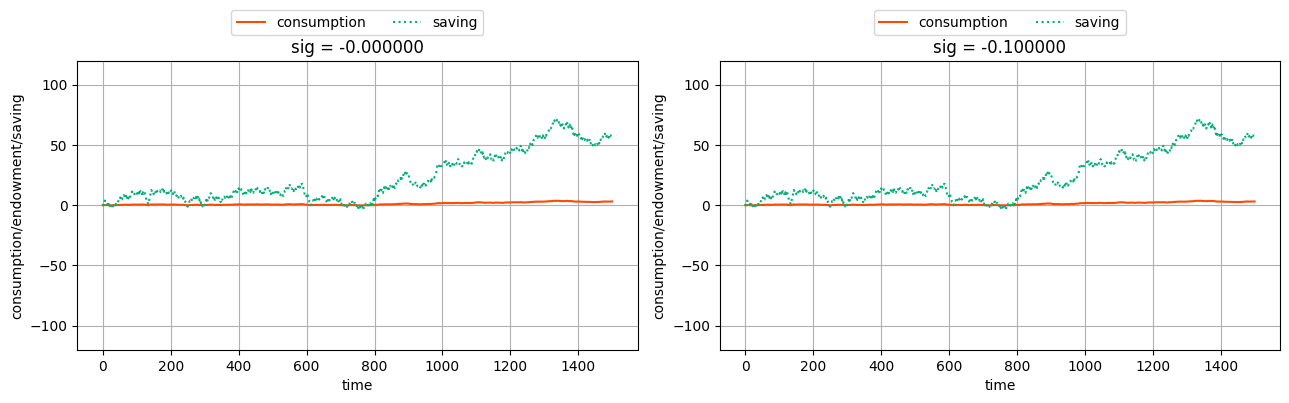

In [396]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[13, 4.2])

# Plot for the left side
axes[1].set_title(f"sig = {sig_arr[1]:.6f}")
axes[1].set_ylim(y_lim)
axes[1].plot(
    np.array(range(iter_t)),
    c_mis_mat_obs[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[1].plot(
    np.array(range(iter_t)),
    d_mis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[1].plot(
    np.array(range(iter_t - 1)),
    k_mis_mat_obs[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[1].set_xlabel("time", fontsize=10)
axes[1].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[1].grid()

# Plot for the right side
axes[0].set_title(f"sig = {sig_arr[0]:.6f}")
axes[0].set_ylim(y_lim)
axes[0].plot(
    np.array(range(iter_t)),
    c_nomis_mat[:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)
""" axes[0].plot(
    np.array(range(iter_t)),
    d_nomis_mat[:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
) """
axes[0].plot(
    np.array(range(iter_t - 1)),
    k_nomis_mat[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)
axes[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
axes[0].set_xlabel("time", fontsize=10)
axes[0].set_ylabel("consumption/endowment/saving", fontsize=10)
axes[0].grid()

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig("%scombined_ch10.png" % dirname)

# Display the combined plot
plt.show()